In [31]:
#Question 1

import pandas as pd

# Reading the CSV files
A = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_A.csv', header=None)
B = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_B.csv', header=None)
C = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_C.csv', header=None)
D = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_D.csv', header=None)
E = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_E.csv', header=None)
x = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_x.csv', header=None)
y = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_y.csv', header=None)
z = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/hw_2_z.csv', header=None)

# 1. max(<A,A>)
max_A = A.max().max()
print("1. max(<A,A>) = ", max_A)

# 2. min (<A,B>)
min_AB = min(A.min().min(), B.min().min())
print("2. min (<A,B>) = ", min_AB)

# 3. sum(<C,D>)
sum_CD = (C + D).sum().sum()
print("3. sum(<C,D>) = ", sum_CD)

# 4. average((C+D)x)
average_CDx = ((C + D).dot(x)).mean().mean()
print("4. average((C+D)x) = ", average_CDx)

# 5. max(<C^T,D^T>x)
# Transposing the matrices C and D
try:
    CTx = C.T.dot(x)
    DTx = D.T.dot(x)
    
    # Ensure the shapes match before adding
    if CTx.shape == DTx.shape:
        max_CTDx = (CTx + DTx).max().max()
        print("5. max(<C^T,D^T>x) = ", max_CTDx)
    else:
        print("5. Error: Shapes of C^T*x and D^T*x do not match")
except ValueError as e:
    print(f"5. Error: {e}")

# 6. min(x ⨂ z)
# Performing outer product of x and z
outer_xz = x.dot(z.T)
min_xz = outer_xz.min().min()
print("6. min(x ⨂ z) = ", min_xz)

# 7. (x ⨂ z)
print("7. (x ⨂ z) = \n", outer_xz)

# 8. sum(A + b - 10)
# Assuming 'b' is the first column of B
sum_Ab_10 = (A.add(b, axis=0) - 10).sum().sum()
print("8. sum(A + b - 10) = ", sum_Ab_10)

# 9. average(A^T B)
average_ATB = (A.T.dot(B)).mean().mean()
print("9. average(A^T B) = ", average_ATB)

# 10. E^T C^T Dx
# As the dimensions are compatible, we can multiply the matrices sequentially
result_10 = E.T.dot(C.T).dot(D).dot(x)
print("10. E^T C^T Dx = \n", result_10)


1. max(<A,A>) =  2.6
2. min (<A,B>) =  -3.2
3. sum(<C,D>) =  -2.700000000000002
4. average((C+D)x) =  -0.47
5. Error: matrices are not aligned
6. min(x ⨂ z) =  -3.7199999999999998
7. (x ⨂ z) = 
       0     1     2
0 -3.72  0.12  0.24
1 -1.86  0.06  0.12
2  0.00  0.00  0.00
3  0.31 -0.01 -0.02
4 -3.72  0.12  0.24
8. sum(A + b - 10) =  -1708.5132153734476
9. average(A^T B) =  -2.774444444444446
10. E^T C^T Dx = 
         0
0  8.8684
1 -4.5020
2 -3.0041
3 -5.5886


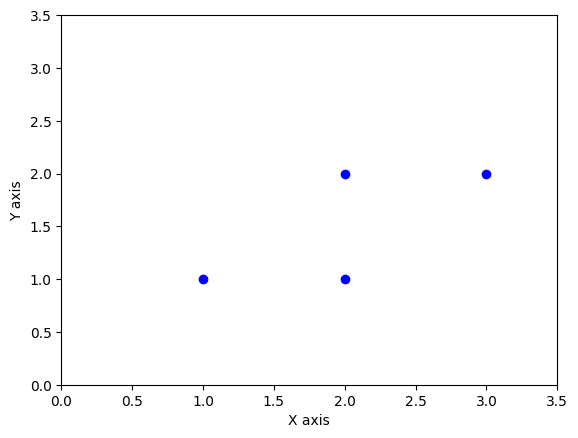

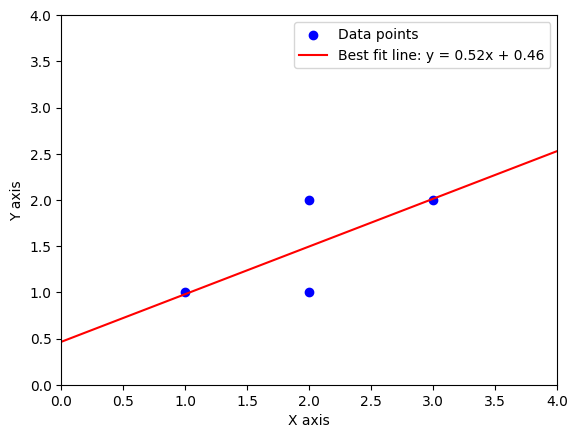

Final slope (a): 0.5161434388102002
Final intercept (b): 0.46442360248215153


In [32]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 2, 3])
y = np.array([1, 1, 2, 2])

# Plot the 4 points of the data
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.show()

# Linear Regression with Gradient Descent
# Initializing parameters
a = 0  # slope
b = 0  # intercept
learning_rate = 0.01
iterations = 1000

m = len(x)  # Number of data points

# Gradient Descent
for i in range(iterations):
    y_pred = a * x + b
    da = (-2/m) * np.sum(x * (y - y_pred))
    db = (-2/m) * np.sum(y - y_pred)
    a = a - learning_rate * da
    b = b - learning_rate * db

# Predicted y values using the trained model
y_pred = a * x + b

# Plotting the line along with the points and extrapolating the line
plt.scatter(x, y, color='blue', label='Data points')

# Create a range for x values to extrapolate the line
x_extrapolate = np.linspace(0, 4, 100)
y_extrapolate = a * x_extrapolate + b

plt.plot(x_extrapolate, y_extrapolate, color='red', label=f'Best fit line: y = {a:.2f}x + {b:.2f}')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.legend()
plt.show()

# Print the final values of a and b
print(f'Final slope (a): {a}')
print(f'Final intercept (b): {b}')


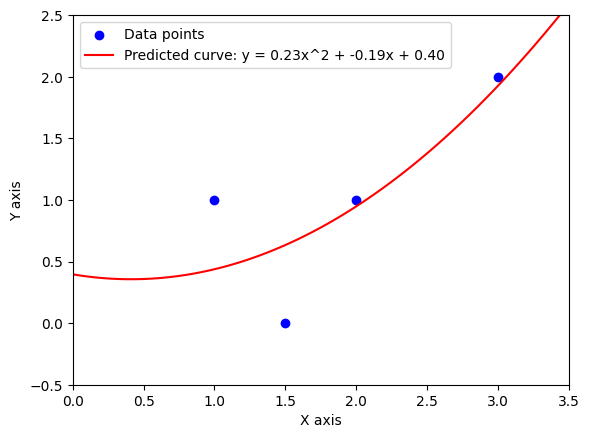

Final quadratic coefficients: a = 0.23417716476266598, b = -0.19256999755599996, c = 0.39588502134210335


In [36]:
# Question 3
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 1.5, 3])
y = np.array([1, 1, 0, 2])

# Initialize parameters (a, b, c)
a = 0
b = 0
c = 0
learning_rate = 0.01
iterations = 1000

m = len(x)  # Number of data points

# Gradient Descent for quadratic regression
for i in range(iterations):
    # Predicted value of y (quadratic model)
    y_pred = a * x**2 + b * x + c
    
    # Compute gradients
    da = (-2/m) * np.sum(x**2 * (y - y_pred))
    db = (-2/m) * np.sum(x * (y - y_pred))
    dc = (-2/m) * np.sum(y - y_pred)
    
    # Update parameters
    a = a - learning_rate * da
    b = b - learning_rate * db
    c = c - learning_rate * dc

# Predicted y values using the trained quadratic model
y_pred = a * x**2 + b * x + c

# Plotting the points and the quadratic curve
x_range = np.linspace(0, 3.5, 100)
y_range = a * x_range**2 + b * x_range + c

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_range, y_range, color='red', label=f'Predicted curve: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim(0, 3.5)
plt.ylim(-0.5, 2.5)
plt.legend()
plt.show()

# Print the final values of a, b, and c
print(f'Final quadratic coefficients: a = {a}, b = {b}, c = {c}')


In [119]:
# set up for question 5

# Example values
x = np.array([1.0, 2.0, 3.0])
w = np.array([0.5, -0.1, 0.8])
A = np.array([[1.0, 0.2, 0.3], [0.2, 1.0, 0.4], [0.3, 0.4, 1.0]])
y_i = np.array([1, -1])
alpha_i = np.array([0, 1])
sigma = 1.0
lam = 0.5

In [118]:
import autograd.numpy as np
from autograd import grad

# 1. Linear: f(x) = y^T x
def f_linear(w, x):
    return np.dot(w.T, x)

def grad_f_linear(w, x):
    return x 

# 1. Linear
print("Linear Function:")
auto_grad = grad(lambda w: f_linear(w, x))
print('Auto ᐁf :', auto_grad(w))
print('Theoretical ᐁf:', grad_f_linear(w, x))

Linear Function:
Auto ᐁf : [1. 2. 3.]
Theoretical ᐁf: [1. 2. 3.]


In [129]:
# 2. Quadratic: f(x) = x^T A x
def f_quadratic(w, A):
    return np.dot(w.T, np.dot(A, w))

def grad_f_quadratic(w, A):
    return 2 * np.dot(A, w)  # Theoretical gradient


# 2. Quadratic
print("\nQuadratic Function:")
auto_grad_quadratic = grad(lambda w: f_quadratic(w, A))
print("Auto grad:", auto_grad_quadratic(w))
print("Theoretical grad:", grad_f_quadratic(w, A))



Quadratic Function:
Auto grad: [1.44 0.64 1.82]
Theoretical grad: [1.44 0.64 1.82]


In [133]:
# 3. Trace of Quadratic: f(x) = Tr(x^T A x)
def f_trace_quadratic(w, A):
    w = w.reshape(-1, 1)  # Ensure w is a 2D column vector
    return np.trace(np.dot(w.T, np.dot(A, w)))

def grad_f_trace_quadratic(w, A):
    return 2 * np.dot(A, w)  # Theoretical gradient

# 3. Trace of Quadratic
print("\nTrace of Quadratic Function:")
auto_grad_trace_quadratic = grad(lambda w: f_trace_quadratic(w, A))
print("Auto grad:", auto_grad_trace_quadratic(w))
print("Theoretical grad:", grad_f_trace_quadratic(w, A))


Trace of Quadratic Function:
Auto grad: [1.44 0.64 1.82]
Theoretical grad: [1.44 0.64 1.82]


In [135]:
# 4. ReLU Activation Function: f(w) = ReLU(w^T x)
def ReLU(z):
    return np.maximum(0, z)

def f_relu(w, x):
    return ReLU(np.dot(w.T, x))

def grad_f_relu(w, x):
    return np.where(np.dot(w.T, x) > 0, x, 0)  # Theoretical gradient

# 4. ReLU
print("\nReLU Activation Function:")
auto_grad_relu = grad(lambda w: f_relu(w, x))
print("Auto grad:", auto_grad_relu(w))
print("Theoretical grad:", grad_f_relu(w, x))


ReLU Activation Function:
Auto grad: [1. 2. 3.]
Theoretical grad: [1. 2. 3.]


In [136]:
# 5. Linear Regression: f(w) = 1/2 Σ (w^T x_i - y_i)^2
def f_linear_regression(w, x_i, y_i):
    return 0.5 * np.sum((np.dot(w.T, x_i) - y_i)**2)

def grad_f_linear_regression(w, x_i, y_i):
    y_i = y_i.reshape(-1, 1) 
    return np.sum((np.dot(w.T, x_i) - y_i) * x_i, axis=0)  # Theoretical gradient

# 5. Linear Regression
print("\nLinear Regression Function:")
auto_grad_linear_regression = grad_f_linear_regression(w, x, y_i)
print("Auto grad:", auto_grad_linear_regression)
print("Theoretical grad:", grad_f_linear_regression(w, x, y_i))


Linear Regression Function:
Auto grad: [ 5.4 10.8 16.2]
Theoretical grad: [ 5.4 10.8 16.2]


In [141]:
# 6. Multivariate Gaussian Tr: f(x) = e^(-Tr(x^T A x))
def f_multivariate_gaussian_tr(w, A):
    w = w.reshape(-1, 1)  # Ensure w is a 2D column vector
    return np.exp(-np.trace(np.dot(w.T, np.dot(A, w))))

def grad_f_multivariate_gaussian_tr(w, A):
    w = w.reshape(-1, 1)  # Ensure w is a 2D column vector
    return -2 * np.dot(A, w) * np.exp(-np.trace(np.dot(w.T, np.dot(A, w))))  # Theoretical gradient

# 6. Multivariate Gaussian Tr
print("\nMultivariate Gaussian Tr Function:")
auto_grad_multivariate_gaussian_tr = grad(lambda w: f_multivariate_gaussian_tr(w, A))
print("Auto grad:", auto_grad_multivariate_gaussian_tr)
print("Theoretical grad:", grad_f_multivariate_gaussian_tr(w, A))


Multivariate Gaussian Tr Function:
Auto grad: [-0.50089595 -0.22262042 -0.63307682]
Theoretical grad: [[-0.50089595]
 [-0.22262042]
 [-0.63307682]]


In [144]:
# 7. Multivariate Gaussian: f(x) = e^(-x^T A x)
def f_multivariate_gaussian(w, A):
    return np.exp(-np.dot(w.T, np.dot(A, w)))

def grad_f_multivariate_gaussian(w, A):
    return -2 * np.dot(A, w) * np.exp(-np.dot(w.T, np.dot(A, w)))  # Theoretical gradient

# 7. Multivariate Gaussian
print("\nMultivariate Gaussian Function:")
auto_grad_multivariate_gaussian = grad(lambda w: f_multivariate_gaussian(w, A))
print("Auto grad:", auto_grad_multivariate_gaussian(w))
print("Theoretical grad:", grad_f_multivariate_gaussian(w, A))


Multivariate Gaussian Function:
Auto grad: [-0.50089595 -0.22262042 -0.63307682]
Theoretical grad: [-0.50089595 -0.22262042 -0.63307682]


In [146]:
# 8. Sigmoid Function: f(z) = 1 / (1 + e^(-z))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def f_sigmoid(w, x):
    return sigmoid(np.dot(w.T, x))

def grad_f_sigmoid(w, x):
    f_w = f_sigmoid(w, x)
    return f_w * (1 - f_w) * x  # Theoretical gradient

# 8. Sigmoid
print("\nSigmoid Function:")
auto_grad_sigmoid = grad(lambda w: f_sigmoid(w, x))
print("Auto grad:", auto_grad_sigmoid(w))
print("Theoretical grad:", grad_f_sigmoid(w, x))


Sigmoid Function:
Auto grad: [0.05900771 0.11801542 0.17702314]
Theoretical grad: [0.05900771 0.11801542 0.17702314]


In [153]:
import autograd.numpy as np
from autograd import grad

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 9. Logistic Regression Objective: f(w) = 1 / (1 + e^{-w^T x})
def f_logistic(w, x):
    return sigmoid(np.dot(w.T, x))

def grad_f_logistic(w, x):
    f_w = f_logistic(w, x)
    return f_w * (1 - f_w) * x  # Theoretical gradient

# 9. Logistic Regression
print("\nLogistic Regression Function:")

auto_grad_logistic = grad(lambda w: f_logistic(w, x))
print("Auto grad:", auto_grad_logistic(w))
print("Theoretical grad:", grad_f_logistic(w, x))



Logistic Regression Function:
Auto grad: [0.05900771 0.11801542 0.17702314]
Theoretical grad: [0.05900771 0.11801542 0.17702314]


In [156]:
# 10. L1 Norm: f(x) = ||x||_1
def f_l1_norm(w):
    return np.sum(np.abs(w))

def grad_f_l1_norm(w):
    return np.sign(w)  # Theoretical gradient

# 10. L1 Norm
print("\nL1 Norm Function:")
auto_grad_l1_norm = grad(f_l1_norm)
print("Auto grad:", auto_grad_l1_norm(w))
print("Theoretical grad:", grad_f_l1_norm(w))


L1 Norm Function:
Auto grad: [ 1. -1.  1.]
Theoretical grad: [ 1. -1.  1.]


In [157]:
# 11. L2 Norm: f(x) = ||x||_2
def f_l2_norm(w):
    return np.sqrt(np.dot(w.T, w))

def grad_f_l2_norm(w):
    return w / np.linalg.norm(w)  # Theoretical gradient

# 11. L2 Norm
print("\nL2 Norm Function:")
auto_grad_l2_norm = grad_f_l2_norm(w)
print("Auto grad:", auto_grad_l2_norm)
print("Theoretical grad:", grad_f_l2_norm(w))


L2 Norm Function:
Auto grad: [ 0.52704628 -0.10540926  0.84327404]
Theoretical grad: [ 0.52704628 -0.10540926  0.84327404]


In [158]:
# 13. PCA Objective: f(x) = x^T A x - λ(x^T x - 1)
def f_pca(w, A, lam):
    return np.dot(w.T, np.dot(A, w)) - lam * (np.dot(w.T, w) - 1)

def grad_f_pca(w, A, lam):
    return 2 * np.dot(A, w) - 2 * lam * w  # Theoretical gradient

# 13. PCA
print("\nPCA Objective Function:")
auto_grad_pca = grad(lambda w: f_pca(w, A, lam))(w)
print("Auto grad:", auto_grad_pca)
print("Theoretical grad:", grad_f_pca(w, A, lam))



PCA Objective Function:
Auto grad: [0.94 0.74 1.02]
Theoretical grad: [0.94 0.74 1.02]


In [175]:

# 14. Gaussian Maximum Likelihood: f(μ) = log(Π(1/√(2πσ^2) e^(-(x_i - μ)^2 / 2σ^2)))
def f_gaussian_mle(mu, x_i, sigma):
    return np.sum(np.log(1 / np.sqrt(2 * np.pi * sigma**2)) - ((x_i - mu)**2) / (2 * sigma**2))


def grad_f_gaussian_mle(mu, x_i, sigma):
    return np.sum((x_i - mu) / sigma**2) 

# 14. Gaussian MLE
mu = 0.0
print("\nGaussian MLE Function:")
auto_grad_gaussian_mle = grad(lambda mu: f_gaussian_mle(mu, x, sigma))
print("Auto grad:", auto_grad_gaussian_mle(mu))
print("Theoretical grad:", grad_f_gaussian_mle(mu, x, sigma))


Gaussian MLE Function:
Auto grad: 6.0
Theoretical grad: 6.0


In [177]:

# 15. Exponential Maximum Likelihood: f(λ) = log(Π λ e^(-λ x_i))
def f_exponential_mle(lam, x_i):
    return np.sum(np.log(lam) - lam * x_i)

def grad_f_exponential_mle(lam, x_i):
    return len(x_i) / lam - np.sum(x_i)  # Theoretical gradient

# 15. Exponential MLE
print("\nExponential MLE Function:")
auto_grad_exponential_mle = grad(lambda lam: f_exponential_mle(lam, x))(lam)
print("Auto grad:", auto_grad_exponential_mle)
print("Theoretical grad:", grad_f_exponential_mle(lam, x))



Exponential MLE Function:
Auto grad: 0.0
Theoretical grad: 0.0


In [179]:
# 16. Bernoulli Maximum Likelihood: f(p) = log(Π p^α_i (1 - p)^(1 - α_i))
def f_bernoulli_mle(p, alpha_i):
    return np.sum(np.log(p**alpha_i * (1 - p)**(1 - alpha_i)))

def grad_f_bernoulli_mle(p, alpha_i):
    return np.sum(alpha_i / p - (1 - alpha_i) / (1 - p))  # Theoretical gradient

# 16. Bernoulli MLE
print("\nBernoulli MLE Function:")
p = 0.5  # Example scalar value for p
auto_grad_bernoulli_mle = grad(lambda p: f_bernoulli_mle(p, alpha_i))(p)
print("Auto grad:", auto_grad_bernoulli_mle)
print("Theoretical grad:", grad_f_bernoulli_mle(p, alpha_i))



Bernoulli MLE Function:
Auto grad: 0.0
Theoretical grad: 0.0


In [180]:
# 17. Uniform Maximum Likelihood: f(a, b) = log(Π 1/(b - a))
def f_uniform_mle(a, b):
    return np.sum(np.log(1 / (b - a)))

def grad_f_uniform_mle(a, b):
    da = -len(x) / (b - a)
    db = len(x) / (b - a)
    return da, db  # Theoretical gradient

# 17. Uniform MLE
print("\nUniform MLE Function:")
auto_grad_uniform_mle = grad(lambda a, b: f_uniform_mle(a, b))(w[0], w[1])
print("Auto grad:", auto_grad_uniform_mle)
print("Theoretical grad:", grad_f_uniform_mle(w[0], w[1]))



Uniform MLE Function:
Auto grad: -1.6666666666666667
Theoretical grad: (np.float64(5.0), np.float64(-5.0))


/opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


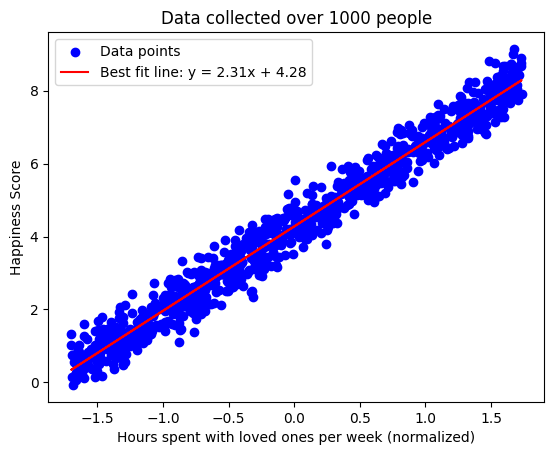

If you spend 15 hours a week with your loved ones, your predicted happiness score is 6.30.


In [38]:
# Question 6
# Load the data
lovedOnes = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/time_with_loved_ones.csv')
happyScore = pd.read_csv('/Users/shreyas/Desktop/ML/HW/hw2/hw_csv_file/happiness_level.csv')

# Extracting the data
x = lovedOnes.values.flatten()
y = happyScore.values.flatten()

# Extracting the data as numpy arrays
x = lovedOnes.values.flatten()
y = happyScore.values.flatten()

# Normalize x for better convergence during gradient descent
x = (x - np.mean(x)) / np.std(x)

# Initialize parameters
a = 0  # slope
b = 0  # intercept
learning_rate = 0.01
iterations = 1000
m = len(x)  # number of data points

# Gradient descent
for i in range(iterations):
    y_pred = a * x + b
    da = (-2/m) * np.sum(x * (y - y_pred))  # gradient with respect to a
    db = (-2/m) * np.sum(y - y_pred)        # gradient with respect to b
    a = a - learning_rate * da
    b = b - learning_rate * db

# Predicted y values using the optimized parameters
y_pred = a * x + b

# Plotting the data points and the regression line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Best fit line: y = {a:.2f}x + {b:.2f}')
plt.title('Data collected over 1000 people')
plt.xlabel('Hours spent with loved ones per week (normalized)')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Predict happiness score if someone spends 15 hours with loved ones (non-normalized value)
hours = 15
# Un-normalize the hours value to make the prediction
hours_normalized = (hours - np.mean(lovedOnes.values.flatten())) / np.std(lovedOnes.values.flatten())
happiness_prediction = a * hours_normalized + b

print(f"If you spend 15 hours a week with your loved ones, your predicted happiness score is {happiness_prediction:.2f}.")
